<a href="https://colab.research.google.com/github/dhyannnn/2030-Assignments/blob/main/Exercise%2021%20-%20Kapitza%20pendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__Dhyan Thakkar__
<br>
Date: Mar. 7, 2022
<br>
PHYS 2030 W22

# <center><font color=#46769B>Exercise 21: Kapitza's pendulum</font></center>

## <font color=#46769B>Introduction</font>

The goals of this exercise are:
- Gain further experience with RK4 methods for solving ODEs
- Study a system of ODEs with interesting behavior

Required reading:
- *Lesson 10: Second-order methods*


## <font color=#46769B>Exercise</font>

Kapitza's pendulum is a pendulum in which the pivot is attached to a motor that causes the pivot to move up and down. 

<div>
<img src="https://github.com/PHYS-2030-Computational-Methods/Lecture-notes/raw/main/figures/KapitzaPendulumScheme.gif" width="240">
</div>

We assume that the vertical motion of the pivot is periodic, described by

$$y(t) = A \, \cos(\nu t)$$

where $A$ is the amplitude and $\nu$ is the angular frequency of the pivot's motion up and down. Recalling that the formula for torque is $\tau = F \ell \sin(\theta)$, where $F = m y''(t)$ is the force due to the pivot's motion on the pendulum arm and $\theta$ is the relative angle between the pendulum and the vertical, we arrive an equation of motion:

$$\theta''(t) + \omega^2 \sin(\theta(t)) + A \nu^2 \cos(\nu t) \sin(\theta(t)) = 0\, . \qquad (1)$$

The usual simple pendulum (recoved by setting $A=0$ above) has two equilibrium positions:
- Stable equilibrium point at $\theta=0$ (hanging straight down). A small push away from $\theta=0$ will lead to small oscillations around the point $\theta=0$.
- Unstable equilibrium point at $\theta = \pi$ (pointing straight up). An arbitrarily small push away from $\theta=\pi$ will lead to a large displacement.

The unusual feature of Kapitsa's pendulum is that a rapid driving force can cause the unstable point at $\theta=\pi$ *to become stable*. Here are one [video](https://www.youtube.com/watch?v=cjGqxF79ITI) and another [video](https://www.youtube.com/watch?v=GgYABmG_bto) that illustrate this phenomenon in action. (Some further links for the interested reader are [here](https://gereshes.com/2019/02/25/kapitzas-pendulum/) and [here](https://en.wikipedia.org/wiki/Kapitza%27s_pendulum).)

## <font color=#46769B>Part (a)</font>

Consider the following parameters:

$$\omega = 2\pi , \quad A = 0.1, \quad \nu = 100$$

Your tasks are as follows:
- Write a code to solve Kapitza's pendulum for the initial condition
$$ \theta(0) = 3, \quad \theta'(0) = 0 \, .$$
over the time interval $[0,10]$. Use the RK4 method (described in Lesson 10) to solve Eq. (1). Your results should do the convergence checking step, until your code has converged to within a tolerance of `atol=rtol=1e-2`.
- Make a plot showing $\theta(t)$ vs $t$ for Kapitsa's pendulum. Show also in the same plot, $\theta(t)$ vs $t$ for the simple pendulum with the same initial condition. What is your conclusion about whether $\theta=\pi$ is stable or unstable?
- Make a plot of $\theta'(t)$ vs $\theta(t)$ for both Kapitsa's pendulum and the simple pendulum. 

This latter type of plot is known as a __phase portrait__, which is nice way to visualize both position and velocity of a trajectory. It is easy to implement from your numerical solutions. Suppose your solutions are saved in a `numpy.array` named `y`, which has size $(N+1) \times 2$. Then you simply do:
```py
theta = y[:,0]
theta_prime = y[:,1]
plt.plot(theta,theta_prime)
```
since recall $\mathbf{y} = (\theta,\theta^\prime)$.

Feel free to use `scipy.integrate.solve_ivp` to check your numerical results, but it is not mandatory.



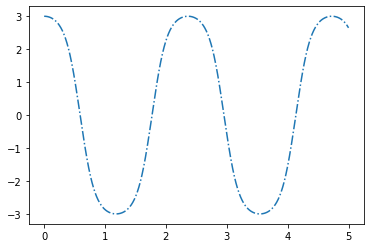

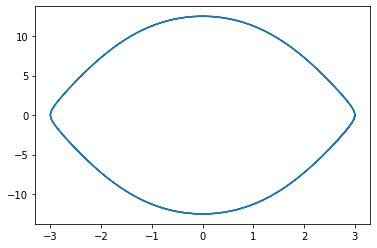

In [2]:
import numpy as np
import matplotlib.pyplot as plt

omega = 2*np.pi
t0, tf = 0, 10

nu = 100
A = 0.1

theta0 = 3
# Define RHS of coupled ODE
def f(t,y):
    y1, y2 = y
    return np.array([y2,-omega**2*np.sin(y1) + A*nu*np.cos(y1)*np.sin(y1)])


def RK4_method(num_steps,theta_0):
    
    t = np.linspace(0,5,num=num_steps+1)
    h = t[1] - t[0]
    
    # initialize output
    y = np.zeros((num_steps+1,2))
    y[0] = [theta_0,0]
    
    for i in range(num_steps):
        
        ti = t[i]
        yi = y[i]
        
        k1 = f(ti,yi) # Stage 1
        k2 = f(ti+0.5*h,yi+0.5*h*k1) # Stage 2
        k3 = f(ti+0.5*h,yi+0.5*h*k2) # Stage 3
        k4 = f(ti+h,yi+h*k3) # Stage 4
        
        # Final slope
        k = (k1 + 2*k2 + 2*k3 + k4)/6
        
        y[i+1] = yi + h*k
        
    return t, y

t, y = RK4_method(1000,3) 
theta = y[:,0]
plt.plot(t,theta,'-.',label="RK4 method")
plt.show()
theta_prime = y[:,1]
plt.plot(theta,theta_prime)



## <font color=#46769B>Part (b)</font>

Now modify Kapitza's pendulum by including a damping term:

$$\theta''(t) + \gamma \theta'(t) + \omega^2 \sin(\theta(t)) + A \nu^2 \cos(\nu t) \sin(\theta(t)) = 0\, . \qquad (2)$$

with the same $t$ interval $[0,10]$ and initial condition 

$$ \theta(0) = 3, \quad \theta'(0) = 0 \, .$$

For a simple pendulum, changing the damping $\gamma$ does not affect where the equilibrium points are, but simple affects how the solution relaxes to there. Here, for Kapitza's pendulum, the situation is much more complex, as you will see.

Repeat the activities in Part (a) for various values of $\gamma$, taking them from `numpy.linspace(0.1,1,num=10)`, and solving Eq. (2) using the RK4 method.
- For each value of $\gamma$, solve for $\theta(t)$ using RK4, ensuring your results have converged as in Part (a).
- Make one plot showing $\theta(t)$ vs $t$ for Kapitsa's pendulum for all values of $\gamma$. (You can divide it up in two or more plots if it looks too busy.)
- Make one plot showing the phase portraits for all values of $\gamma$. (Again, feel free to break it into multiple plots if it looks too busy.) 
- Discuss qualitatively what you found, i.e., how the apparent equilibrium position varies as a function of $\gamma$.

Feel free to use `scipy.integrate.solve_ivp` to check your numerical results, but it is not mandatory. Note if you do use `solve_ivp`, it may be useful to increase the tolerance settings by adding thse keywords, e.g., `atol=1e-10, rtol=1e-10`.



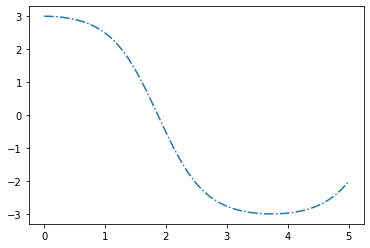

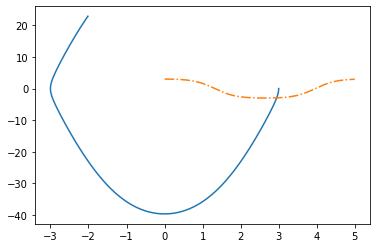

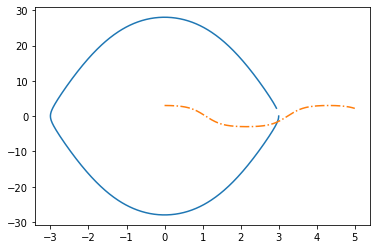

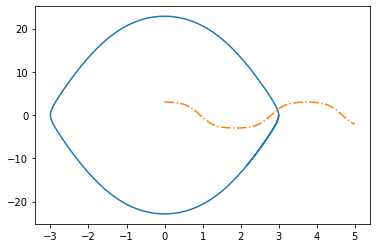

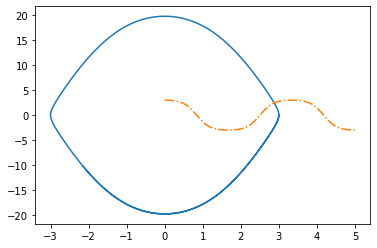

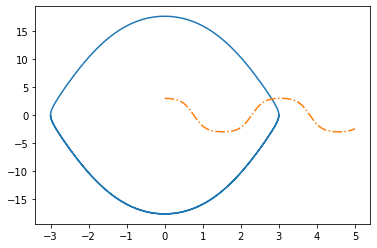

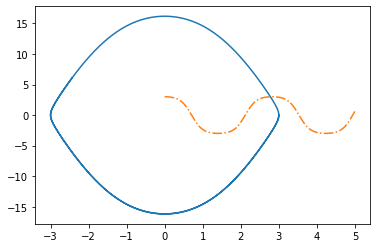

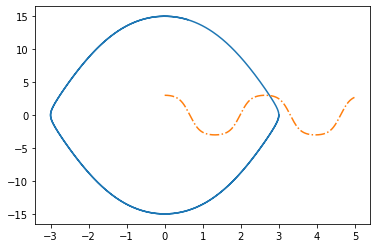

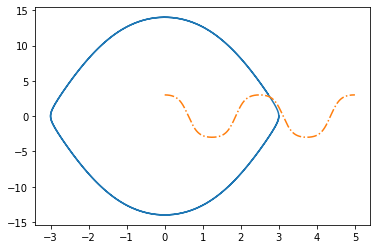

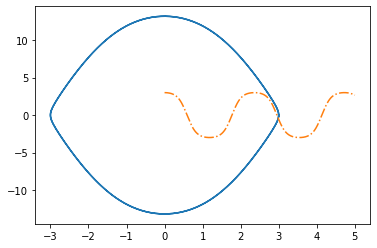

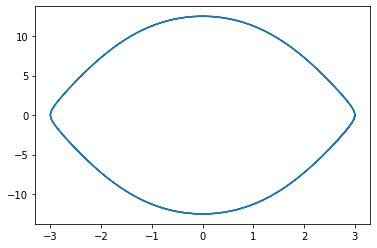

In [8]:
import numpy as np
import matplotlib.pyplot as plt 

omega = 2*np.pi
t0, tf = 0, 10

nu = 100
A = 0.1

gamma = np.linspace(0.1,1,num=10)
theta0 = 3
# Define RHS of coupled ODE
for j in gamma:
  def f(t,y):
    y1, y2 = y
    return np.array([j*y2,-omega**2*np.sin(y1) + A*nu*np.cos(y1)*np.sin(y1)])
  t, y = RK4_method(1000,3) 
  theta = y[:,0]
  plt.plot(t,theta,'-.',label="RK4 method")
  plt.show()
  theta_prime = y[:,1]
  plt.plot(theta,theta_prime)
